<img src="https://upload.wikimedia.org/wikipedia/commons/7/7c/Kaggle_logo.png" align="left" height=100 width=200>

[**Kaggle - Cruise Ship Data**](https://www.kaggle.com/datasets/shauryajain/cruise-ship-data)

# ℹ️ Readme

* ✍️ This notebook was written by [Justin Carville](https://github.com/just1nt1me)
* 🎯 The goal is build a machine learning model that can predict how many crew members are needed for a cruise ship.

# 📚 Import Libraries

In [ ]:
# DATA MANIPULTION 
import pandas as pd 
import numpy as np

# DATA VIZ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# STATS
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

# MACHINE LEARNING
## MODEL SELECTION
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
## SCALERS
from sklearn.preprocessing import RobustScaler, StandardScaler
# LINEAR MODELS
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
# NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor
# SVM
from sklearn.svm import SVR
# TREES AND ENSEMBLE METHODS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
## EVALUATION
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
## MODEL TUNING
from sklearn.model_selection import GridSearchCV

# 💾 Dataset and EDA

In [ ]:
# import csv as dataframe
data = pd.read_csv('Sample_Data.csv', encoding = 'shift_jis')

In [ ]:
data.head()

,船名,グルーズ名,経過年数,トン数,乗客数,長さ,船室,乗客密度,乗組員
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [ ]:
data.shape

(158, 9)

In [ ]:
data.nunique()

船名       138
グルーズ名     20
経過年数      31
トン数       94
乗客数      104
長さ        80
船室        98
乗客密度     109
乗組員       91
dtype: int64

In [ ]:
data.dtypes

船名        object
グルーズ名     object
経過年数       int64
トン数      float64
乗客数      float64
長さ       float64
船室       float64
乗客密度     float64
乗組員      float64
dtype: object

In [ ]:
data.describe()

,経過年数,トン数,乗客数,長さ,船室,乗客密度,乗組員
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [ ]:
data['船名'].value_counts()

Spirit          4
Legend          3
Star            3
Rhapsody        2
Mariner         2
               ..
Serena          1
Romantica       1
Mediterranea    1
Marina          1
Surf            1
Name: 船名, Length: 138, dtype: int64

In [ ]:
data['グルーズ名'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: グルーズ名, dtype: int64

## 👬🏽 Duplicates / 👽 NA's

In [ ]:
print(f"number of duplicated rows = {data.duplicated().sum()}")

number of duplicated rows = 0


In [ ]:
data.isna().sum()

船名       0
グルーズ名    0
経過年数     0
トン数      0
乗客数      0
長さ       0
船室       0
乗客密度     0
乗組員      0
dtype: int64

## 📊Visualize Target Distribution, Outliers, Gaussianity

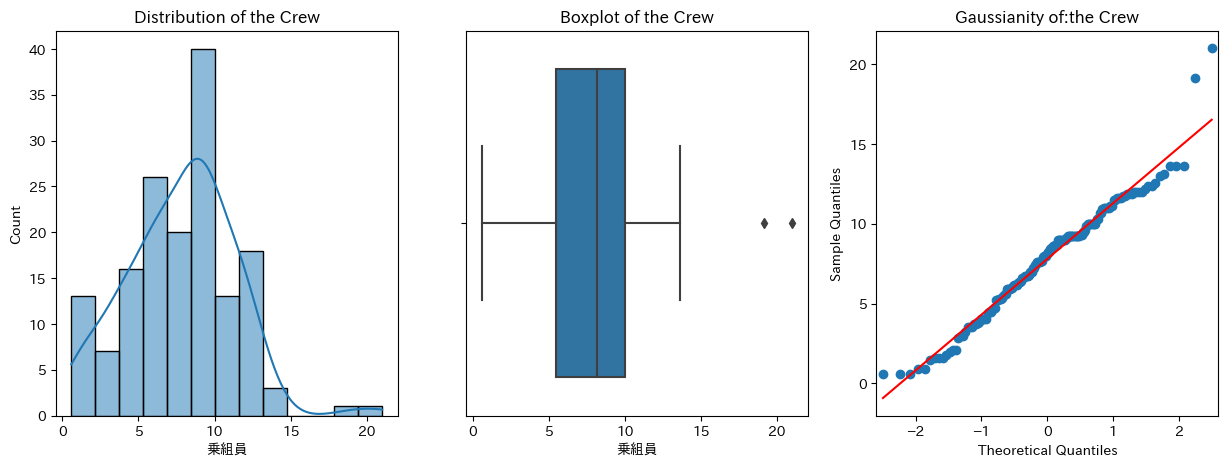

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the Crew")
sns.histplot(data = data, x = '乗組員', kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the Crew")
sns.boxplot(data = data, x = '乗組員', ax=ax[1])

ax[2].set_title(f"Gaussianity of:the Crew")
qqplot(data['乗組員'],line='s',ax=ax[2]);

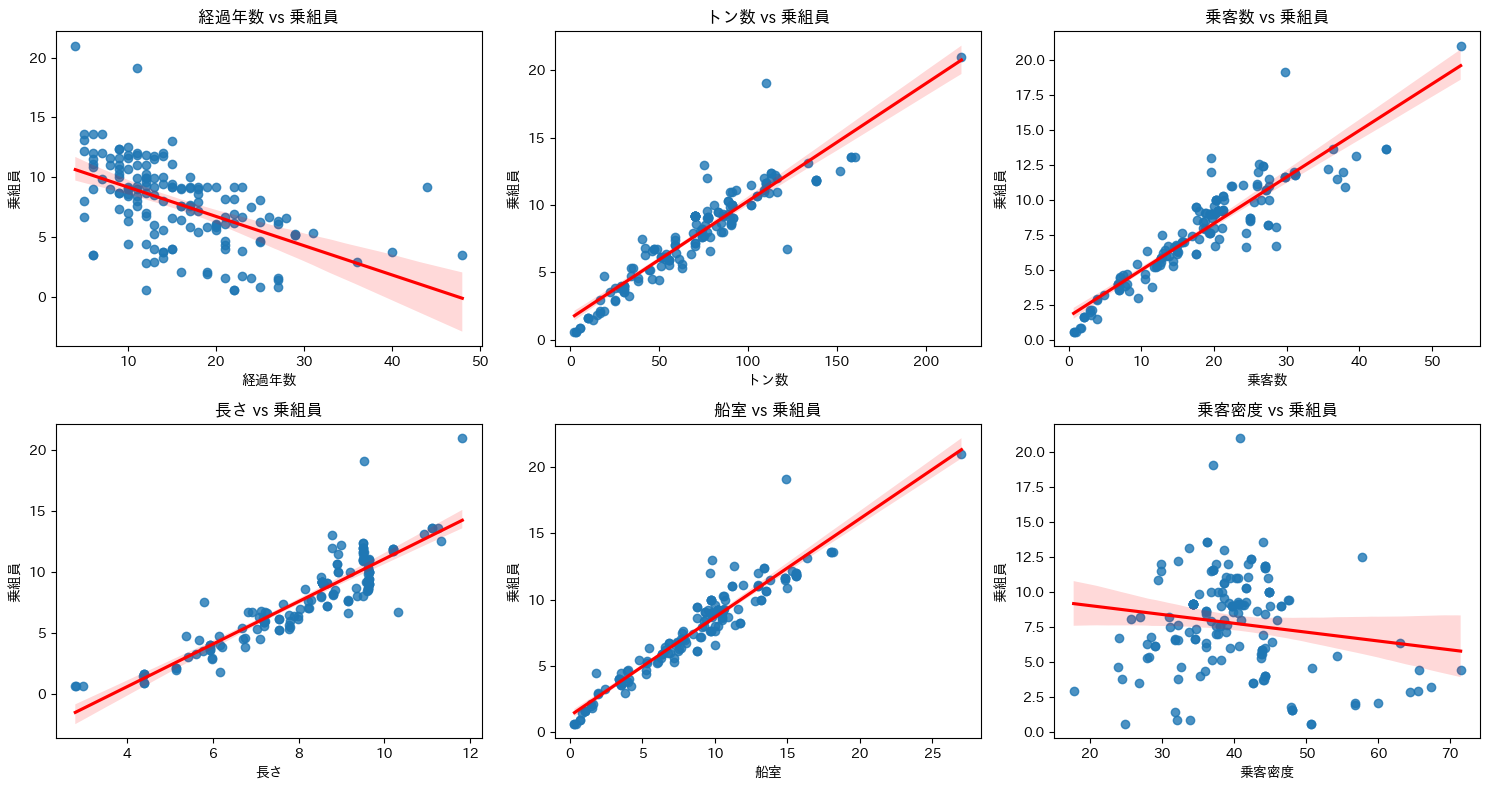

In [ ]:
columns = ['経過年数', 'トン数', '乗客数', '長さ', '船室', '乗客密度']
target = '乗組員'

fig, ax = plt.subplots(2,3,figsize=(15,8))

for i, x in enumerate(columns):
    row_index = i // 3  # Row index of the subplot
    col_index = i % 3   # Column index of the subplot
    ax[row_index, col_index].set_title(f"{x} vs 乗組員")
    sns.regplot(data=data, x=x, y=target, ax=ax[row_index, col_index], 
               line_kws={'color': 'red'})

plt.tight_layout()
plt.show();

In [ ]:
#check outliers
data.sort_values(by='乗組員', ascending=False).head()

,船名,グルーズ名,経過年数,トン数,乗客数,長さ,船室,乗客密度,乗組員
134,Oasis,Royal_Caribbean,4,220.0,54.00,11.82,27.00,40.74,21.0
3,Conquest,Carnival,11,110.0,29.74,9.53,14.88,36.99,19.1
124,Freedom,Royal_Caribbean,7,158.0,43.70,11.12,18.00,36.16,13.6
129,Liberty,Royal_Caribbean,6,158.0,43.70,11.25,18.00,36.16,13.6
126,Independence,Royal_Caribbean,5,160.0,36.34,11.12,18.17,44.03,13.6


## 🌡️Calculate Pearson Correlation Coefficient

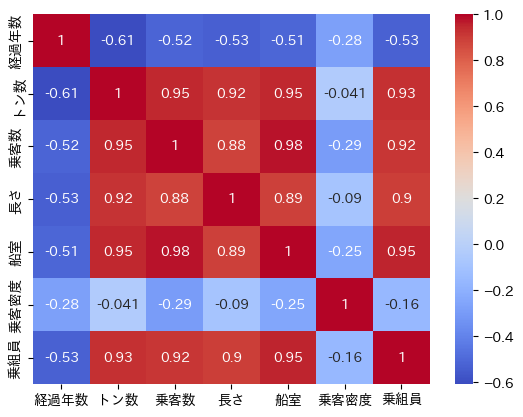

In [ ]:
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show();

## 💭 Initial Analysis

- data units may be in 100's or 1000's, which explains why the tons, length of ship, # of rooms, # of crew are such low numbers
- data is already clean, as there are no missing values or duplicates 😌
- looking at histogram, # of crew is normal (Gaussian) and there are only 2 outliers of larger cruiseships, so more crew, etc.

# 🧪 Model

- i will drop 船名, グルーズ名 from the X features. Because this is categorical data, it is possible to use OHE to encode, but it will result in too many columns. I think the model should be able to predict well without them.
- there are only 2 outliers, so i will first make a model including them

## 🧬Set X Features and Y Target

In [ ]:
X = data.drop(columns=['乗組員'])
X = X.select_dtypes(exclude = ['object'])
X.dtypes

経過年数      int64
トン数     float64
乗客数     float64
長さ      float64
船室      float64
乗客密度    float64
dtype: object

In [ ]:
y = data['乗組員']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 22)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 22)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((110, 6), (48, 6), (110,), (48,))

## 🔢 Scaling numerical features

In [ ]:
rob = RobustScaler()
rob.fit(X_train)
X_train_scaled = pd.DataFrame(rob.transform(X_train),
                              columns=rob.get_feature_names_out()
                             )
X_test_scaled = pd.DataFrame(rob.transform(X_test),
                              columns=rob.get_feature_names_out()
                             )
# X_val_scaled = pd.DataFrame(rob.transform(X_val),
#                               columns=rob.get_feature_names_out()
#                              )

In [ ]:
X_train_scaled.describe()

,経過年数,トン数,乗客数,長さ,船室,乗客密度
count,110.000000,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02
mean,0.212727,-0.049499,-0.097722,-0.196916,-1.617021e-01,8.178810e-02
std,0.803902,0.668111,0.713593,0.627692,7.770294e-01,9.195086e-01
min,-0.900000,-1.321466,-1.404148,-1.996429,-1.650324e+00,-2.142530e+00
25%,-0.300000,-0.618679,-0.626090,-0.657143,-7.548566e-01,-4.535505e-01
50%,0.000000,0.000000,0.000000,0.000000,-1.643650e-16,-3.625572e-16
75%,0.700000,0.381321,0.373910,0.342857,2.451434e-01,5.464495e-01
max,3.400000,1.740895,1.911223,0.989286,1.628122e+00,2.912191e+00


In [ ]:
X_train_scaled.head()

,経過年数,トン数,乗客数,長さ,船室,乗客密度
0,-0.4,0.383069,0.462105,0.382143,0.209066,-0.277424
1,0.7,-0.995868,-0.856755,-1.135714,-0.993525,-1.514380
2,-0.5,0.886306,0.538864,0.342857,0.671600,0.598117
3,2.2,-1.039394,-0.738903,-1.121429,-1.024977,-2.142530
4,-0.3,0.412922,0.053499,0.389286,0.092507,0.781369


## 🐣 Baseline Model - Average # Crew

In [ ]:
avg_crew = y_train.mean()
avg_crew

7.60190909090909

In [ ]:
len(y_test)

48

In [ ]:
y_test.head()

115     4.45
77     11.09
35      9.20
46      5.45
112     9.00
Name: 乗組員, dtype: float64

In [ ]:
y_pred_baseline = pd.Series([avg_crew]*len(y_test))
y_pred_baseline.head()

0    7.601909
1    7.601909
2    7.601909
3    7.601909
4    7.601909
dtype: float64

In [ ]:
mse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
print("Root Mean Squared Error:", mse)

Root Mean Squared Error: 3.769895928443485


In [ ]:
mae = mean_absolute_error(y_test, y_pred_baseline)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.937886363636364


In [ ]:
r2 = r2_score(y_test, y_pred_baseline)
print("R-squared:", r2)

R-squared: -0.02900033891545606


## 🚀Test Different Models

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train_scaled, y_train)

# # Evaluate the model on the validation set
# y_test_pred = model.predict(X_test_scaled)
# test_r2 = r2_score(y_test, y_test_pred)
# print("Validation R-squared:", test_r2)

LinearRegression()

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_test_scaled, y_test, cv=5, verbose=True)
cv_scores
mean_cv_score = np.mean(cv_scores)
print("Mean cross-validation score:", mean_cv_score)

Mean cross-validation score: 0.9436755285510474


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
# list of models to try
models = [LinearRegression(),
          Ridge(),
          Lasso(),
          ElasticNet(),
          SGDRegressor(),
          KNeighborsRegressor(),
          SVR(kernel = "linear"),
          SVR(kernel = "poly", degree = 2),
          SVR(kernel = "poly", degree = 3),          
          SVR(kernel = "rbf"),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          AdaBoostRegressor(),
          GradientBoostingRegressor()]

# list of model names
models_names = ["linear_regression",
                "ridge",
                "lasso",
                "elastic_net",
                "sgd_regressor",
                "kneighbors_regressor",
                "SVR_linear",
                "SVR_poly_two",
                "SVR_poly_three",
                "SVR_rbf",                
                "decision_tree_regressor",
                "random_forest_regressor",
                "ada_boost_regressor",
                "gradient_boosting_regressor"]

In [ ]:
# %%time

# different_test_scores = []

# for model_name, model in zip(models_names, models):
#     model.fit(X_train_scaled, y_train)
#     val_score = model.score(X_val_scaled, y_val)
#     y_test_pred = model.predict(X_test_scaled)
#     test_score = r2_score(y_test, y_test_pred)
#     different_test_scores.append((model_name, val_score, test_score))

# comparing_regression_models = pd.DataFrame(different_test_scores, 
#                                            columns=['model_name', 'val_score', 'test_score'])
# comparing_regression_models = comparing_regression_models.sort_values(by='test_score', ascending=False)

# round(comparing_regression_models, 2)

In [ ]:
different_test_scores = []

for model_name, model in zip(models_names, models):

    model.fit(X_train_scaled, y_train)
    different_test_scores.append(np.mean(cross_val_score(model, X_test_scaled, y_test)))
    

comparing_regression_models = pd.DataFrame(list(zip(models_names, different_test_scores)),
                                                columns =['model_name', 'test_score'])

round(comparing_regression_models.sort_values(by = "test_score", ascending = False),2)

,model_name,test_score
0,linear_regression,0.94
1,ridge,0.92
6,SVR_linear,0.92
4,sgd_regressor,0.88
13,gradient_boosting_regressor,0.81
5,kneighbors_regressor,0.80
11,random_forest_regressor,0.80
2,lasso,0.78
3,elastic_net,0.76
12,ada_boost_regressor,0.76


## 🤔 Initial Results

- By scaling the data and running the model on numerical features, I was able to achieve quite a high R2 score, even with a simple linear regression model.データをスケーリングし、数値特徴量を用いてモデルを実行することで、単純な線形回帰モデルでもかなり高い精度を達成することができました。

# 🔧 Model Tuning

 1. Check for multicolinearity between features and check feature permutation.特徴量間の多重共線性や特徴量の順列を確認してみる。
 
 2. I will try to make a new model with updated features to see if it improves performance. 新しいモデルを作ってみて、乗組員との相関が少ないため、経年変化と乗組員密度を落として、パフォーマンスが向上するかどうか試してみることにする。
 
 3. Try changing model hyperparameters to improve performance　モデルのハイパーパラメータを変更して性能が向上するか試してみる
 
 4. Drop outliers　外れ値を削除してみる

## 🕸️ Check for Multicolinearity

### VIF 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vif_df = pd.DataFrame()

vif_df["features"] = X_train_scaled.columns

vif_df["vif_index"] = [vif(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]

round(vif_df.sort_values(by="vif_index", ascending = False),2)

,features,vif_index
4,船室,35.34
2,乗客数,31.85
1,トン数,23.10
3,長さ,7.56
5,乗客密度,3.29
0,経過年数,1.82


### Feature Permutation

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
# Fit model
model = LinearRegression().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model, X_test_scaled, y_test, 
                                           scoring='neg_mean_absolute_error',
                                          random_state=22) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_test_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
4,船室,3.842277
2,乗客数,1.428907
1,トン数,0.321769
3,長さ,0.210048
0,経過年数,0.002051
5,乗客密度,-0.000772


## 🧮 New Model without 経過年数 and 乗客密度

In [ ]:
data.columns

Index(['船名', 'グルーズ名', '経過年数', 'トン数', '乗客数', '長さ', '船室', '乗客密度', '乗組員'], dtype='object')

In [ ]:
#create a function to process dataframe for modeling
def preprocessor(dataframe):
    X = dataframe[['トン数', '乗客数', '長さ', '船室']]
    y = dataframe['乗組員']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
    rob = RobustScaler()
    rob.fit(X_train)
    X_train_scaled = pd.DataFrame(rob.transform(X_train),
                                  columns=rob.get_feature_names_out())
    X_test_scaled = pd.DataFrame(rob.transform(X_test),
                                  columns=rob.get_feature_names_out())
    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocessor(data)

In [ ]:
%%time

different_test_scores = []

for model_name, model in zip(models_names, models):

    model.fit(X_train_scaled, y_train)
    different_test_scores.append(np.mean(cross_val_score(model, X_test_scaled, y_test)))
    

comparing_regression_models = pd.DataFrame(list(zip(models_names, different_test_scores)),
                                                columns =['model_name', 'test_score'])

round(comparing_regression_models.sort_values(by = "test_score", ascending = False),2)

CPU times: user 1.55 s, sys: 0 ns, total: 1.55 s
Wall time: 1.68 s


,model_name,test_score
0,linear_regression,0.95
6,SVR_linear,0.92
1,ridge,0.92
4,sgd_regressor,0.88
12,ada_boost_regressor,0.83
5,kneighbors_regressor,0.83
11,random_forest_regressor,0.82
13,gradient_boosting_regressor,0.79
2,lasso,0.78
3,elastic_net,0.76


## ✂️ Model without Outliers

In [ ]:
#create a function to process dataframe for modeling
def no_outliers(df):
    no_outliers_df = df[df['乗組員'] <= 19]
    X = no_outliers_df[['トン数', '乗客数', '長さ', '船室']]
    y = no_outliers_df['乗組員']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22)
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = pd.DataFrame(ss.transform(X_train),
                                  columns=ss.get_feature_names_out())
    X_test_scaled = pd.DataFrame(ss.transform(X_test),
                                  columns=ss.get_feature_names_out())
    return X_train_scaled, X_test_scaled, y_train, y_test

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = no_outliers(data)

In [ ]:
%%time

different_test_scores = []

for model_name, model in zip(models_names, models):

    model.fit(X_train_scaled, y_train)
    different_test_scores.append(np.mean(cross_val_score(model, X_test_scaled, y_test)))
    

comparing_regression_models = pd.DataFrame(list(zip(models_names, different_test_scores)),
                                                columns =['model_name', 'test_score'])

round(comparing_regression_models.sort_values(by = "test_score", ascending = False),2)

CPU times: user 1.31 s, sys: 0 ns, total: 1.31 s
Wall time: 1.42 s


,model_name,test_score
6,SVR_linear,0.93
1,ridge,0.93
0,linear_regression,0.93
4,sgd_regressor,0.93
11,random_forest_regressor,0.91
5,kneighbors_regressor,0.90
3,elastic_net,0.88
13,gradient_boosting_regressor,0.88
12,ada_boost_regressor,0.86
2,lasso,0.85


## 🔍 Checking Hyperparameters

### Linear SVR

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocessor(data)

In [ ]:
param_grid = {
    'C': np.arange(5, 20, 1), 
    'epsilon': np.arange(.01, .1, .01)  
}

In [ ]:
svr = SVR(kernel='linear')

grid_search = GridSearchCV(estimator=svr, 
                           param_grid=param_grid, 
                           cv=5,
                          scoring= ['r2'],
                          refit= 'r2',
                          n_jobs= -1)

In [ ]:
%%time
grid_search.fit(X_train_scaled, y_train)

CPU times: user 823 ms, sys: 416 ms, total: 1.24 s
Wall time: 5.44 s


GridSearchCV(cv=5, estimator=SVR(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'epsilon': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             refit='r2', scoring=['r2'])

In [ ]:
grid_search.best_score_

0.9083557388086231

In [ ]:
grid_search.best_estimator_

SVR(C=5, epsilon=0.09, kernel='linear')

### Ridge Regressor 

In [ ]:
X_train_scaled, X_test_scaled, y_train, y_test = preprocessor(data)

In [ ]:
param_grid = {
    'alpha' : np.arange(.1, 1, .1)
} 

In [ ]:
grid_search = GridSearchCV(estimator = Ridge(),
                           param_grid = param_grid,
                           cv = 5,
                           scoring = ['r2','neg_mean_squared_error'],
                           refit = 'r2',
                           n_jobs = -1)

grid_search

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [ ]:
%%time
grid_search.fit(X_train_scaled, y_train)

CPU times: user 157 ms, sys: 23.2 ms, total: 180 ms
Wall time: 183 ms


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [ ]:
grid_search.best_score_

0.9103425444305813

In [ ]:
grid_search.best_estimator_

Ridge(alpha=0.2)

### ElasticNet

In [ ]:
param_grid1 = {
    'alpha' : np.arange(.3, 1, .1),
    'l1_ratio' : [0.2, 0.5, 0.8]}    

In [ ]:
grid_search1 = GridSearchCV(estimator = ElasticNet(),
                           param_grid = param_grid1,
                           cv = 5,
                           scoring = ['r2','neg_mean_squared_error'],
                           refit = 'r2',
                           n_jobs = -1)

grid_search1

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'l1_ratio': [0.2, 0.5, 0.8]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [ ]:
%%time
grid_search1.fit(X_train_scaled, y_train)

CPU times: user 246 ms, sys: 33.5 ms, total: 280 ms
Wall time: 308 ms


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'l1_ratio': [0.2, 0.5, 0.8]},
             refit='r2', scoring=['r2', 'neg_mean_squared_error'])

In [ ]:
grid_search1.best_score_

0.8835589064790785

In [ ]:
grid_search1.best_estimator_

ElasticNet(alpha=0.3, l1_ratio=0.8)

# 👨‍🔬 Conclusion

- The models performed slightly better by reducing the n-dimensions after removing several features. モデルは、いくつかの特徴量を削除した後、n次元を減らすことでわずかに改善されました。
- I was unable to significantly improve model performance by tweaking hyperparameters such as the learning rate (alpha), or the L1 loss function penalty.学習率（アルファ）やL1損失関数ペナルティなどのハイパーパラメータを微調整しても、モデルの性能を大幅に改善することができませんでした。
- To further improve model performance, it may be worth creating a new feature to rank the cruise companies based on quality/ticket value.モデルの性能をさらに向上させるためには、クルーズ会社を品質/チケット価値に基づいてランク付けするための新しい特徴量を作成することが価値があるかもしれません。